## Downloading and importing libraries 

In [ ]:
!pip install pandas
!pip install seaborn
!pip install plotly
!pip install matplotlib

In [2]:
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Reading Dataset

Before reading the dataset, it was modified on excel to divide the columns using the "text to columns" function on excel and delimiting the text with commas, as the file was supplied in CSV( comma separated values ) format. I also removed the text at the bottom, leaving only our dataset in the CSV file.

In [98]:
df = pd.read_csv(r"C:\Users\mr-be\OneDrive\Bureau\Technologue Job interview\Census Profile Data 2021- Greater Sudbury.csv", encoding = 'windows-1252')

In [99]:
df.head()

,Census Profile,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,"Greater Sudbury / Grand Sudbury, City (CV) [Ce...",NaN
1,NaN,NaN,NaN,Counts,NaN
2,Topic,Characteristic,Note,Total,Total_Flag
3,Population and dwellings,"Population, 2021",1,166004,NaN
4,Population and dwellings,"Population, 2016",1,161531,NaN


We can already see a few issues with our dataset. Let's start cleaning it a bit

## 1. Data cleaning and Preparation

In [100]:
#Renaming the columns with the content of row 2, more appropriate
df.columns = df.iloc[2] 

# removing useless rows
df = df.drop(0,axis = 0)
df = df.drop(1,axis = 0)
df = df.drop(2,axis = 0)

In [101]:
df.head()

2,Topic,Characteristic,Note,Total,Total_Flag
3,Population and dwellings,"Population, 2021",1,166004,NaN
4,Population and dwellings,"Population, 2016",1,161531,NaN
5,Population and dwellings,"Population percentage change, 2016 to 2021",NaN,2.8,NaN
6,Population and dwellings,Total private dwellings,2,75967,NaN
7,Population and dwellings,Private dwellings occupied by usual residents,3,71476,NaN


Now, we do a sanity check on the data 

In [102]:
df.shape # number of columns and rows 

(141, 5)

In [103]:
df.isnull().sum() # number of null values per column

2
Topic               0
Characteristic      0
Note               72
Total              20
Total_Flag        109
dtype: int64

The Total_flag column has 222 null values out of 254. There is no much data to be obtained from it. Let's remove it along with the note column that also doesn't provide much in the context of this exercice.

In [104]:
df =df.drop('Note',axis = 1)
df = df.drop('Total_Flag', axis = 1 )

In [105]:
df.head() 

2,Topic,Characteristic,Total
3,Population and dwellings,"Population, 2021",166004
4,Population and dwellings,"Population, 2016",161531
5,Population and dwellings,"Population percentage change, 2016 to 2021",2.8
6,Population and dwellings,Total private dwellings,75967
7,Population and dwellings,Private dwellings occupied by usual residents,71476


Our table seems much better already. With three columns : Topic, Characteristic and Total

In [106]:
df.info() # information about the number of rows, non null elements and type of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 3 to 143
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Topic           141 non-null    object
 1   Characteristic  141 non-null    object
 2   Total           121 non-null    object
dtypes: object(3)
memory usage: 3.4+ KB


We see that there's an issue with the data type in the 'Total' Column. It should be numerical and not Object type. Let's change that :

In [107]:
df['Total'] = df['Total'].astype(float) # changed to float to take into account the non integer values. 

In [108]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 3 to 143
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Topic           141 non-null    object 
 1   Characteristic  141 non-null    object 
 2   Total           121 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.4+ KB


Our 'Total' Column is in the right Data type

In [109]:
df = df.reset_index(drop=True) #reset indexes

In [110]:
df = df.rename_axis(None, axis=1) #remove the index column name 

## 2. Filtering Demographic information

First, let's pinpoint the rows that interest us by using the topic as a way to navigate the dataframe

In [111]:
topic_set = set()
for t in df['Topic'] :
    topic_set.add(t)
print(topic_set)

{'Citizenship', 'Knowledge of official languages', 'Visible minority', 'Highest certificate', 'Admission category and applicant type', 'Eligibility and instruction in the minority official language for school-aged children', 'Immigrant status and period of immigration', 'Indigenous population', 'Secondary (high) school diploma or equivalency certificate', 'Children eligible for instruction in the minority official language', 'Age characteristics', 'Population and dwellings'}


We go through the topics, searching for the indexes of the rows that interest us

In [112]:
pop= df[df['Topic'] == 'Population and dwellings']
pop

,Topic,Characteristic,Total
0,Population and dwellings,"Population, 2021",166004.00
1,Population and dwellings,"Population, 2016",161531.00
2,Population and dwellings,"Population percentage change, 2016 to 2021",2.80
3,Population and dwellings,Total private dwellings,75967.00
4,Population and dwellings,Private dwellings occupied by usual residents,71476.00
5,Population and dwellings,Population density per square kilometre,52.10
6,Population and dwellings,Land area in square kilometres,3186.26


In [113]:
lang_know= df[df['Topic'] == 'Knowledge of official languages']
lang_know

,Topic,Characteristic,Total
40,Knowledge of official languages,Total - Knowledge of official languages for th...,164135.0
41,Knowledge of official languages,English only,102225.0
42,Knowledge of official languages,French only,1460.0
43,Knowledge of official languages,English and French,60035.0
44,Knowledge of official languages,Neither English nor French,410.0


In [114]:
indig= df[df['Topic'] == 'Indigenous population']
indig

,Topic,Characteristic,Total
45,Indigenous population,Total - Indigenous identity for the population...,163030.0
46,Indigenous population,Indigenous identity,17930.0
47,Indigenous population,Single Indigenous responses,17440.0
48,Indigenous population,First Nations (North American Indian),7935.0
49,Indigenous population,Métis,9405.0
50,Indigenous population,Inuk (Inuit),100.0
51,Indigenous population,Multiple Indigenous responses,305.0
52,Indigenous population,Indigenous responses not included elsewhere,185.0
53,Indigenous population,Non-Indigenous identity,145095.0
54,Indigenous population,Total - Registered or Treaty Indian status for...,163030.0


In [115]:
immig = df[df['Topic'] == 'Immigrant status and period of immigration']
immig

,Topic,Characteristic,Total
62,Immigrant status and period of immigration,Total - Immigrant status and period of immigra...,163030.0
63,Immigrant status and period of immigration,Non-immigrants,149620.0
64,Immigrant status and period of immigration,Immigrants,9850.0
65,Immigrant status and period of immigration,Before 1980,4220.0
66,Immigrant status and period of immigration,1980 to 1990,720.0
67,Immigrant status and period of immigration,1991 to 2000,865.0
68,Immigrant status and period of immigration,2001 to 2010,1300.0
69,Immigrant status and period of immigration,2011 to 2021,2745.0
70,Immigrant status and period of immigration,2011 to 2015,1115.0
71,Immigrant status and period of immigration,2016 to 2021,1635.0


In [116]:
minority = df[df['Topic'] == 'Visible minority']
minority

,Topic,Characteristic,Total
80,Visible minority,Total - Visible minority for the population in...,163030.0
81,Visible minority,Total visible minority population,10825.0
82,Visible minority,South Asian,3105.0
83,Visible minority,Chinese,985.0
84,Visible minority,Black,4030.0
85,Visible minority,Filipino,440.0
86,Visible minority,Arab,340.0
87,Visible minority,Latin American,705.0
88,Visible minority,Southeast Asian,400.0
89,Visible minority,West Asian,145.0


Now we have our rows. The indexes are as follow : 0, 42, 46, 64, 81.  Let's make a new dataframe with these rows. We'll call it, df_demo :

In [129]:
df_demo = df.loc[[0,42,46,64,81]] #creating the sub dataframe

In [130]:
df_demo = df_demo.reset_index(drop = True) #resetting index
df_demo['Total'] = df_demo['Total'].astype(int) # Now that we only have int values, we can change the type again

In [131]:
df_demo

,Topic,Characteristic,Total
0,Population and dwellings,"Population, 2021",166004
1,Knowledge of official languages,French only,1460
2,Indigenous population,Indigenous identity,17930
3,Immigrant status and period of immigration,Immigrants,9850
4,Visible minority,Total visible minority population,10825


Now let's calculate the percentage of each group compared to the total population of Greater Sudbury in the year 2021. Let's start by creating a function that will do the calculations for us : 

In [145]:
def percent_of_Sudbury(row) :
    sudbury_population = df_demo.loc[0,'Total']
    percent = ( row['Total']/ sudbury_population ) * 100
    value = f"{row['Total']}/{sudbury_population} * 100 = {percent:.2f}%"
    return value

In [146]:
df_demo['Inclusion groups percentage'] = df_demo.apply(percent_of_Sudbury, axis = 1) # Create new row and assign values to it based on our function
df_demo

,Topic,Characteristic,Total,Inclusion groups percentage
0,Population and dwellings,"Population, 2021",166004,166004/166004 * 100 = 100.00%
1,Knowledge of official languages,French only,1460,1460/166004 * 100 = 0.88%
2,Indigenous population,Indigenous identity,17930,17930/166004 * 100 = 10.80%
3,Immigrant status and period of immigration,Immigrants,9850,9850/166004 * 100 = 5.93%
4,Visible minority,Total visible minority population,10825,10825/166004 * 100 = 6.52%


It is difficult to calculate the total percentage of population that falls into an inclusion group, since there will be common elements between the groups. Example : a Moroccan immigrant whose language knowledge is limited to french can be included in The french only group, the immigrant group and the visible minority group. As such, with the available data, it is impossible to clearly divide between these groups. However, we can do a broad approximation by adding up these groups together.

In [164]:
def percent_of_Sudbury_bis(row) :
    sudbury_population = df_demo.loc[0,'Total']
    percent = ( row['Total']/ sudbury_population ) * 100
    #value = f"{row['Total']}/{sudbury_population} * 100 = {percent:.2f}%"
    return percent
df_demo['percentages'] = df_demo.apply(percent_of_Sudbury_bis, axis = 1)
inclus_percent = df_demo['percentages'].sum() - 100
print(f"The total percentage of inclusive groups in Sudbury represents {inclus_percent:.2f}% of the population")

The total percentage of inclusive groups in Sudbury represents 24.13% of the population


Let's add some vizualisation to make it more visible.

Here's a pie chart representing the minorities compared to the total population of Sudbury 

<Figure size 1000x600 with 0 Axes>

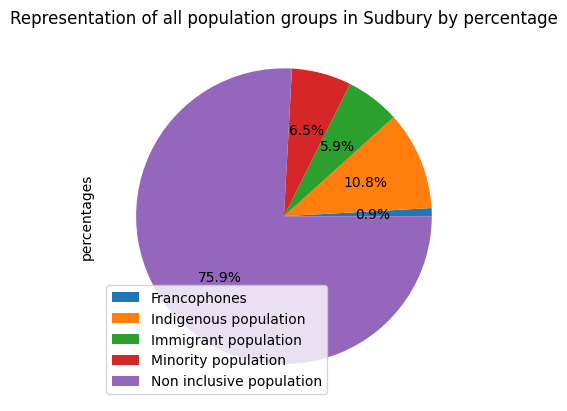

In [232]:
temp_df = df_demo[1:5]
temp_df = temp_df[['Characteristic','percentages']]
temp_df.loc[len(temp_df.index)+1] = ['Non-inclusive population', 100 - 24.13] 
temp_df
plt.figure(figsize=(10, 6)) 
temp_df.plot(kind='pie', y = 'percentages', autopct='%1.1f%%', labels=None) 
plt.title('Representation of all population groups in Sudbury by percentage')
plt.legend(['Francophones', 'Indigenous population', 'Immigrant population', 'Minority population','Non inclusive population' ], loc='lower left')
plt.show()

Here is a pie chart representing the percentages of each group amongst the inclusive groups in Sudbury.

<Figure size 1000x600 with 0 Axes>

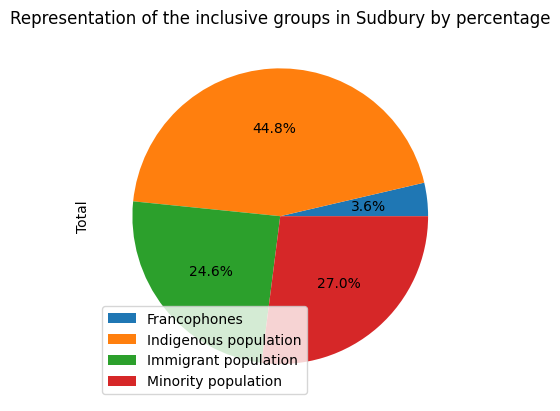

In [210]:
# Create the pie chart
plt.figure(figsize=(10, 6)) 
df_demo_bis.plot(kind='pie', y = 'Total', autopct='%1.1f%%', labels=None) 
plt.title('Representation of the inclusive groups in Sudbury by percentage')
plt.legend(['Francophones', 'Indigenous population', 'Immigrant population', 'Minority population' ], loc='lower left')
plt.show()